# Mean Absolute Error (MAE)

-  The mean absolute error has a problem which is that the absolute value function is not differentiable. This may not be good if we want to use methods such as gradient descent.

- This is a useful metric to optimize when the value you are trying to predict follows a skewed distribution

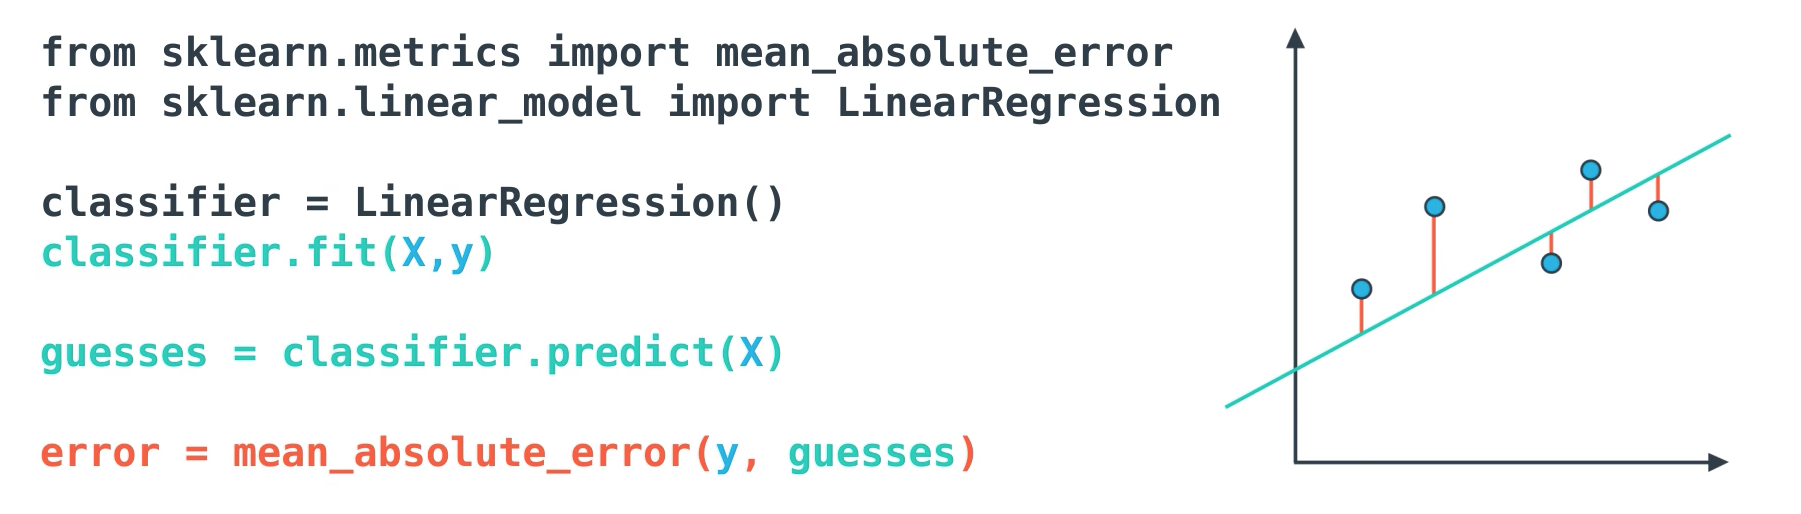

# Mean-Squared Error (MSE)

In many cases, it is easier to actually optimize on MSE, as the quadratic term is differentiable. However, an absolute value is not differentiable. This factor makes this metric better for gradient-based optimization algorithms.

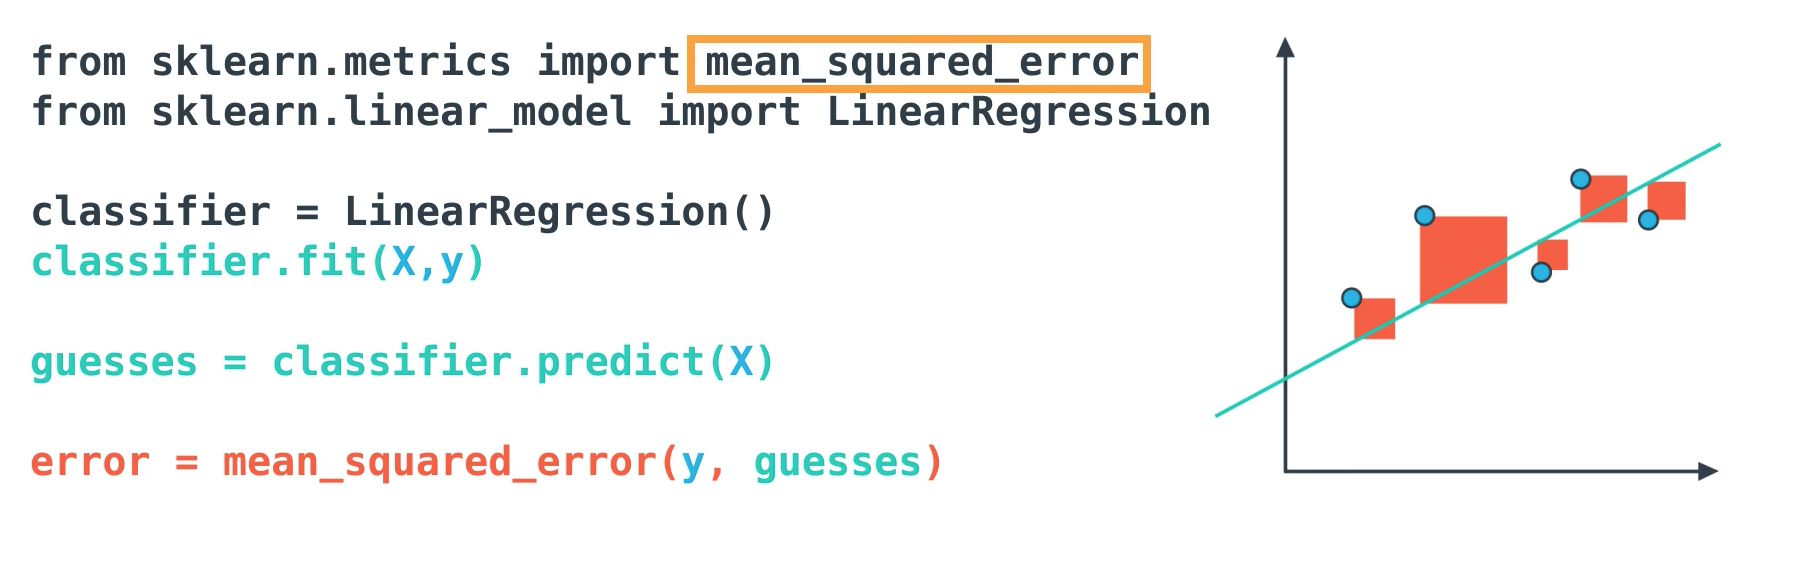

# R2 score

- R2 score is based on comparing our model to the simplest possible model

Let's think, what is the simplest possible model that fits a bunch of points? Well, a pretty simple one is just to take the average of all the values and draw a horizontal line through them, and we can calculate the mean squared error for this model

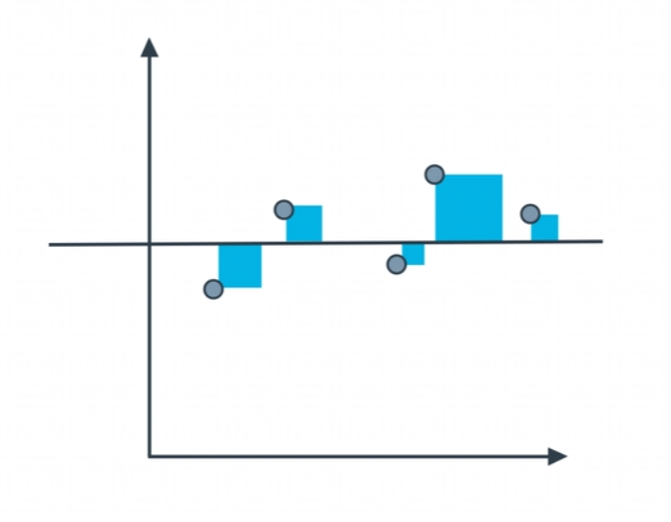



- if the R2 score is close to one, then the model is good. If it's close to zero, then the model is not much better than just guessing the average of the values of the points 

$$R2 = 1 - \frac{mean-squared-error-of-your-model}{mean-squared-error-of-the-simplest-model}$$


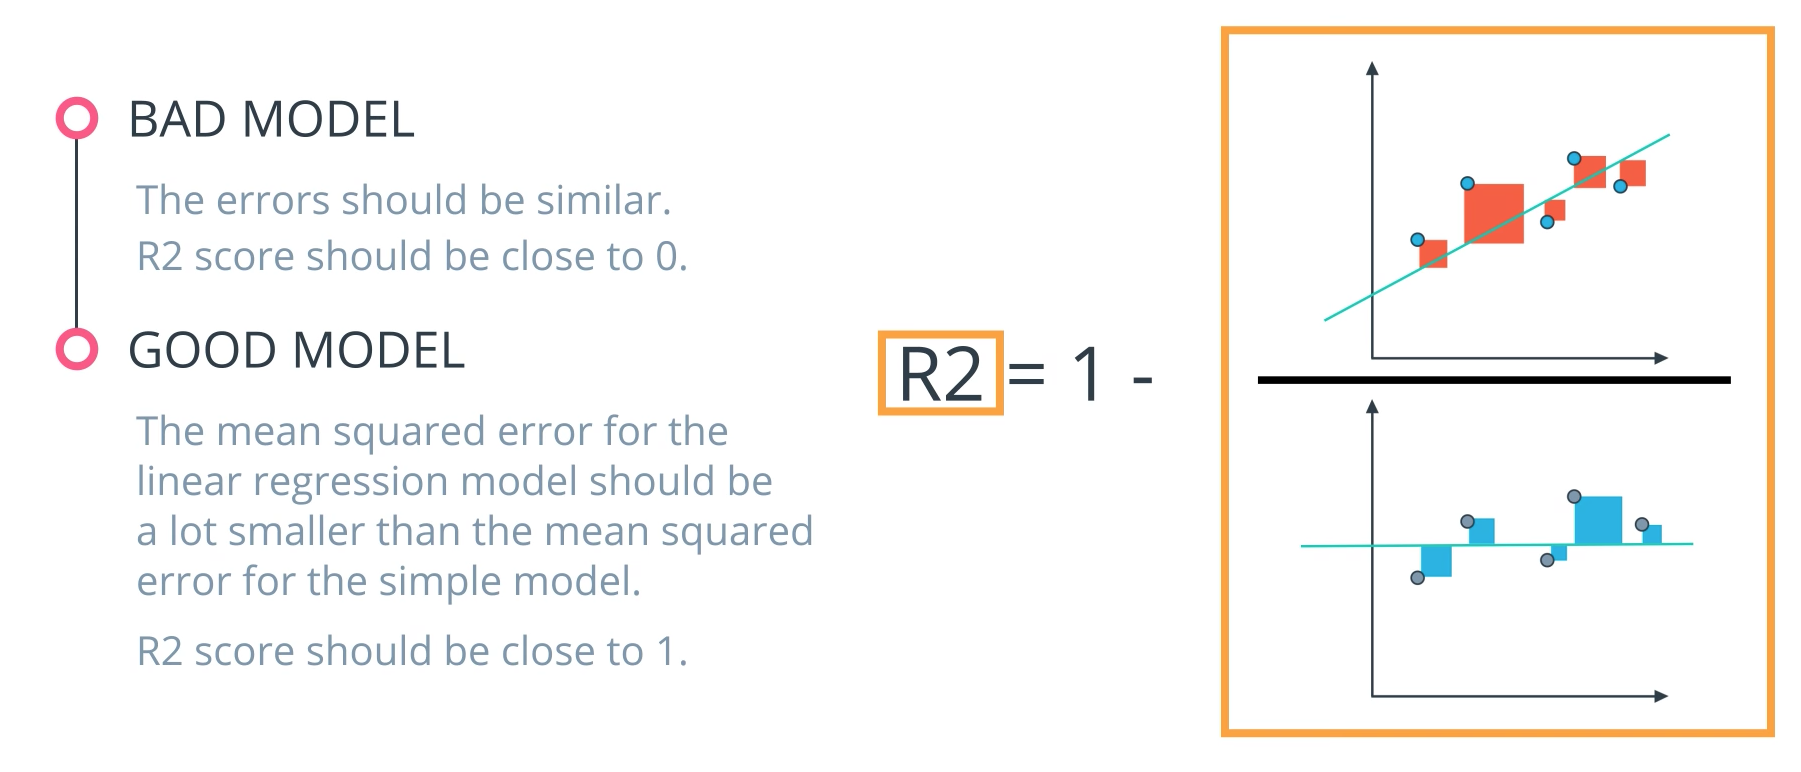

### California Housing Data

In order to gain a better understanding of the metrics used in regression settings, we will be looking at the Boston Housing dataset.  

First use the cell below to read in the dataset and set up the training and testing data that will be used for the rest of this problem.

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
import L03_tests2 as t
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
y = housing.target
X = housing.data

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42)

> **Step 1:** Before we get too far, let's do a quick check of the models that you can use in this situation given that you are working on a regression problem.  Use the dictionary and corresponding letters below to provide all the possible models you might choose to use.

In [7]:
# When can you use the model - use each option as many times as necessary
a = 'regression'
b = 'classification'
c = 'both regression and classification'

models = {
    'decision trees': c,
    'random forest': c,
    'adaptive boosting': c,
    'logistic regression': b,
    'linear regression': a
}

#checks your answer, no need to change this code
t.q1_check(models)

That's right!  All but logistic regression can be used for predicting numeric values.  And linear regression is the only one of these that you should not use for predicting categories.  Technically sklearn won't stop you from doing most of anything you want, but you probably want to treat cases in the way you found by answering this question!


> **Step 2:** Now for each of the models you found in the previous question that can be used for regression problems, import them using sklearn.

In [9]:
# Import models from sklearn - notice you will want to use 
# the regressor version (not classifier) - googling to find 
# each of these is what we all do!

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

> **Step 3:** Now that you have imported the 4 models that can be used for regression problems, instantate each below.

In [10]:
# Instantiate each of the models you imported
# For now use the defaults for all the hyperparameters
linear_model = LinearRegression()
tree_model = tree.DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
ada_model= AdaBoostRegressor();

> **Step 4:** Fit each of your instantiated models on the training data.

In [13]:
# Fit each of your models using the training data
linear_model.fit(X_train,y_train)
tree_model.fit(X_train,y_train)
random_forest_model.fit(X_train,y_train)
ada_model.fit(X_train,y_train)

AdaBoostRegressor()

> **Step 5:** Use each of your models to predict on the test data.

In [15]:
# Predict on the test values for each model
y_linear = linear_model.predict(X_test)
y_tree = tree_model.predict(X_test)
y_random_forest = random_forest_model.predict(X_test)
y_ada = ada_model.predict(X_test)

> **Step 6:** Now for the information related to this lesson.  Use the dictionary to match the metrics that are used for regression and those that are for classification.

In [19]:
# potential model options
a = 'regression'
b = 'classification'
c = 'both regression and classification'

#
metrics = {
    'precision': b,
    'recall': b,
    'accuracy': b,
    'r2_score': a,
    'mean_squared_error': a,
    'area_under_curve': b, 
    'mean_absolute_area': a
}

#checks your answer, no need to change this code
t.q6_check(metrics)

That's right! Looks like you know your metrics!


> **Step 6:** Now that you have identified the metrics that can be used in for regression problems, use sklearn to import them.

In [21]:
# Import the metrics from sklearn

from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score ,mean_absolute_error, mean_squared_error,auc

> **Step 7:** Similar to what you did with classification models, let's make sure you are comfortable with how exactly each of these metrics is being calculated.  We can then match the value to what sklearn provides.

In [23]:
def r2(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the r-squared score as a float
    '''
    sse = np.sum((actual-preds)**2)
    sst = np.sum((actual-np.mean(actual))**2)
    return 1 - sse/sst

# Check solution matches sklearn
print(r2(y_test, y_tree))
print(r2_score(y_test, y_tree))
print("Since the above match, we can see that we have correctly calculated the r2 value.")

0.5980295720040424
0.5980295720040424
Since the above match, we can see that we have correctly calculated the r2 value.


> **Step 8:** Your turn fill in the function below and see if your result matches the built in for mean_squared_error. 

In [27]:
def mse(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the mean squared error as a float
    '''
    
    return np.sum((actual-preds)**2)/ len(actual)


# Check your solution matches sklearn
print(mse(y_test, y_tree))
print(mean_squared_error(y_test, y_tree))
print("If the above match, you are all set!")

0.5356625023087933
0.5356625023087933
If the above match, you are all set!


> **Step 9:** Now one last time - complete the function related to mean absolute error.  Then check your function against the sklearn metric to assure they match. 

In [30]:
def mae(actual, preds):
    '''
    INPUT:
    actual - numpy array or pd series of actual y values
    preds - numpy array or pd series of predicted y values
    OUTPUT:
    returns the mean absolute error as a float
    '''
    
    return np.sum(abs(actual-preds))/ len(actual)

# Check your solution matches sklearn
print(mae(y_test, y_tree))
print(mean_absolute_error(y_test, y_tree))
print("If the above match, you are all set!")

0.4752711024662361
0.4752711024662361
If the above match, you are all set!


> **Step 10:** Which model performed the best in terms of each of the metrics?  Note that r2 and mse will always match, but the mae may give a different best model.  Use the dictionary and space below to match the best model via each metric.

In [38]:
#match each metric to the model that performed best on it
a = 'decision tree'
b = 'random forest'
c = 'adaptive boosting'
d = 'linear regression'


best_fit = {
    'mse': b,
    'r2': b,
    'mae': b
}

#Tests your answer - don't change this code
t.check_ten(best_fit)

That's right!  The random forest was best in terms of all the metrics this time!


In [ ]:
# cells for work

In [37]:
import pandas as pd
def getScore(actual, preds, method):
    mae_error = mean_absolute_error(actual, preds)
    mse_error = mean_squared_error(actual, preds)
    r2Score = r2_score(actual, preds)
    return [method,mae_error,mse_error,r2Score]
    

def getMax(ef):
    result = []
    for item in array:
        result.append(getScore(item[0],item[1],item[2]));
    dfRes = pd.DataFrame(result);
    dfRes.columns = ["method","mae_error","mse_error","r2Score"]

    print(dfRes)


        
array = [[y_test, y_linear, "linear regression"],
         [y_test, y_tree, "decision tree"],
         [y_test, y_random_forest, "random forest"],
         [y_test, y_ada, "adaptive boosting"]]
         
getMax(array)

              method  mae_error  mse_error   r2Score
0  linear regression   0.529571   0.536969  0.597049
1      decision tree   0.475271   0.535663  0.598030
2      random forest   0.333381   0.258502  0.806016
3  adaptive boosting   0.764683   0.777415  0.416614
